# Income Predictor

The pupose of this small project is to predict whether an individual's income is greater than or less than $50,000. We will employ different classification methods and cross validated them to see which is the most effective for this scenario.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

from collections import Counter

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split, KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

sns.set(style='white', context='notebook', palette='deep')

# Read the Data

Read the data set and display the number of null values for each field. Looks like no nulls exist

In [2]:
csv = pd.read_csv('adult.csv')
csv.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [3]:
csv.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

What the data we're working with looks like

In [4]:
csv.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K


In [5]:
csv['income'] = csv['income'].map({'<=50K': 0, '>50K': 1, '<=50K.': 0, '>50K.': 1})
csv.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,0
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,0
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,1
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,0
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,1


# Exploratory Data Analysis

Divide the fields by those that are categorical and those that are numerical

Text(0.5,1,'<=50k and >50k Count')

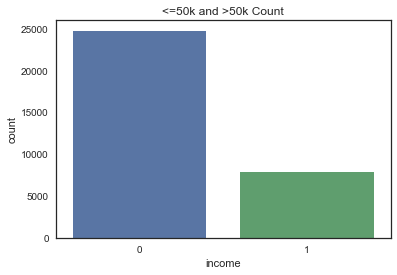

In [6]:
features_numeric = ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week', 'income']
features_cat = ['workclass','education','marital.status', 'occupation', 'relationship', 'race', 'sex', 'native']

sns.countplot(csv['income'], label = 'Count').set_title('<=50k and >50k Count')

Correlation heatmap

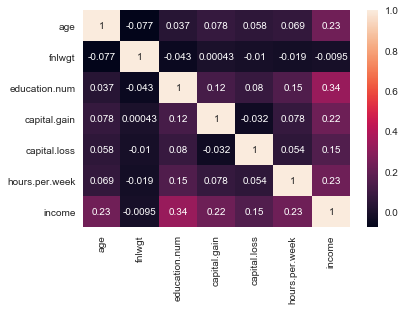

In [7]:
corr = sns.heatmap(csv[features_numeric].corr(), annot = True)

Plots for various feature combinations

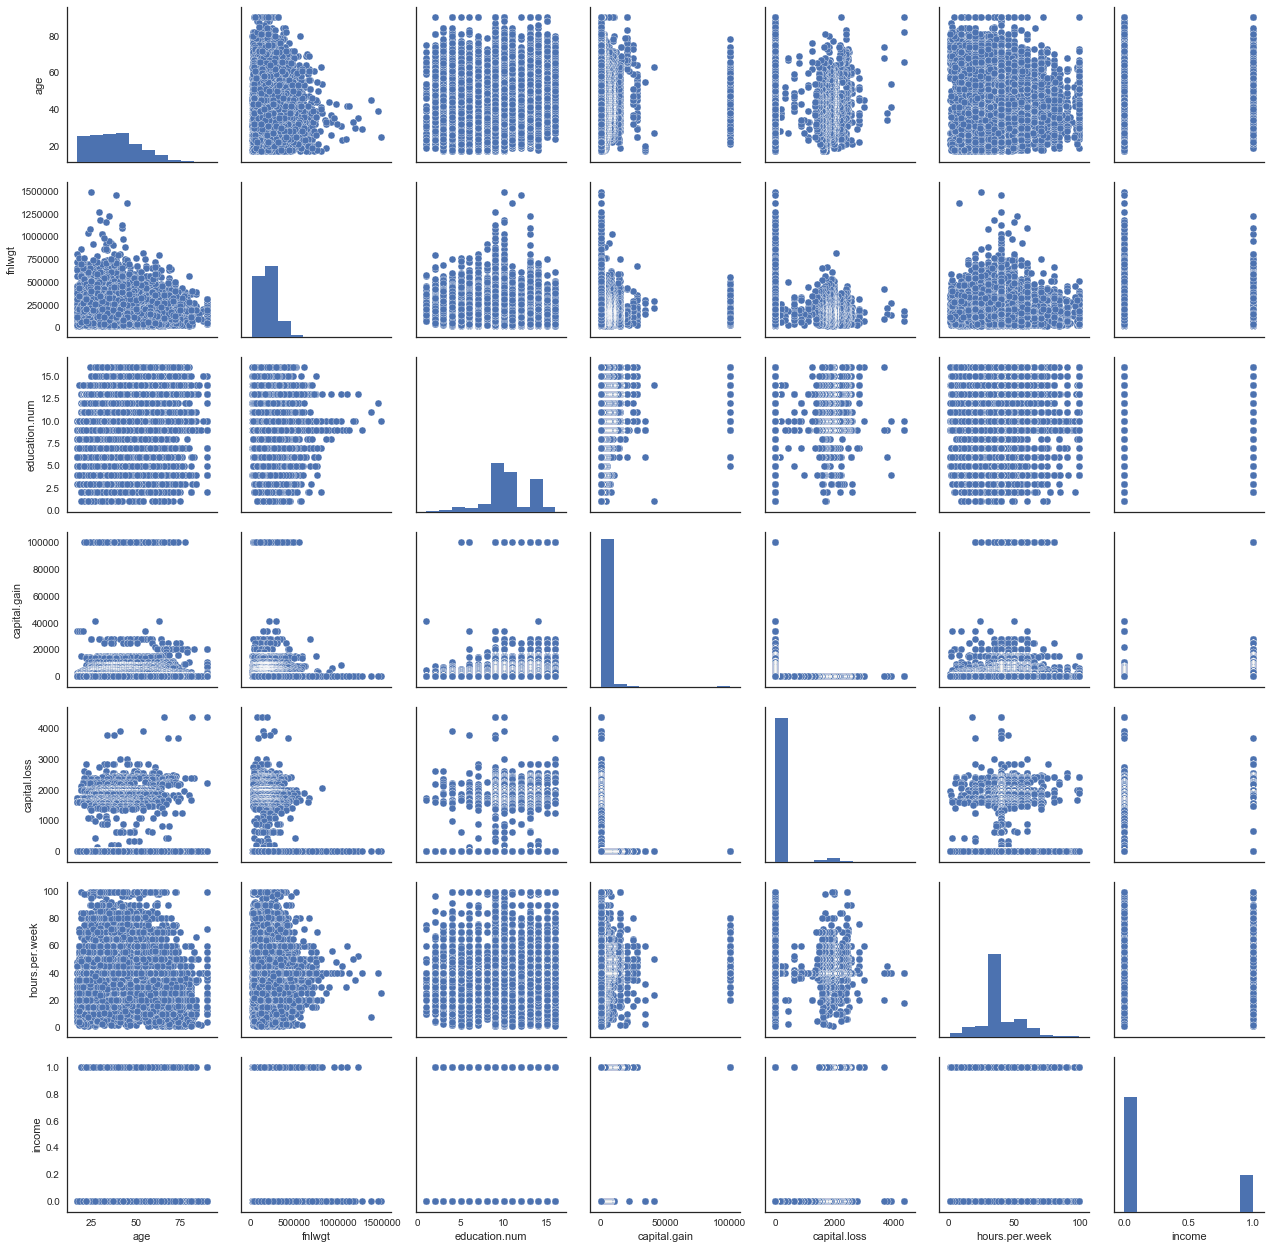

In [8]:
sns.pairplot(csv[features_numeric])

Probablity of making over $50K based on age

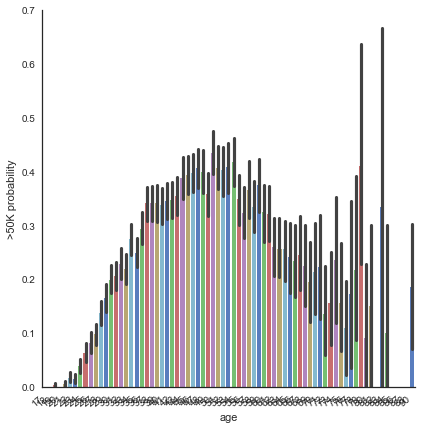

In [9]:
p = sns.factorplot(data = csv, x = 'age', y = 'income', size = 6, palette='muted', kind='bar')
p.despine()
p.set_xticklabels(rotation=40, ha="right")
p = p.set_ylabels(">50K probability")

Probablity of making over $50K based on Education

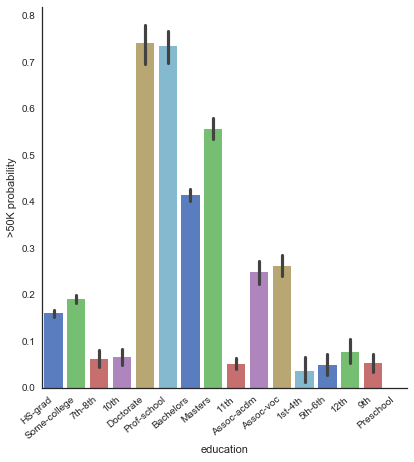

In [10]:
p = sns.factorplot(data = csv, x = 'education', y = 'income', size = 6, palette='muted', kind='bar')
p.despine()
p.set_xticklabels(rotation=40, ha="right")
p = p.set_ylabels(">50K probability")

Probablity of making over $50K based on Education level

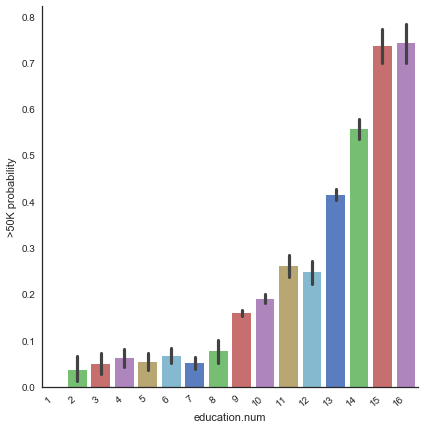

In [11]:
p = sns.factorplot(data = csv, x = 'education.num', y = 'income', size = 6, palette='muted', kind='bar')
p.despine()
p.set_xticklabels(rotation=40, ha="right")
p = p.set_ylabels(">50K probability")

Probablity of making over $50K based on Work Class

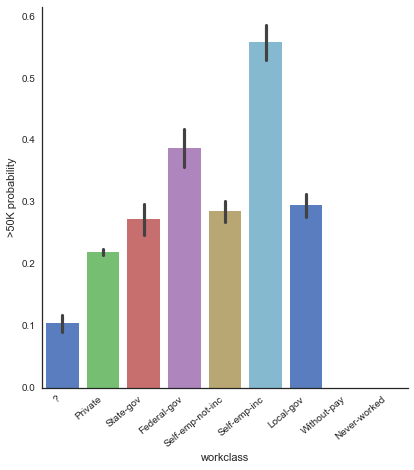

In [12]:
p = sns.factorplot(data = csv, x = 'workclass', y = 'income', size = 6, palette='muted', kind='bar')
p.despine()
p.set_xticklabels(rotation=40, ha="right")
p = p.set_ylabels(">50K probability")

Probablity of making over $50K based on Gender

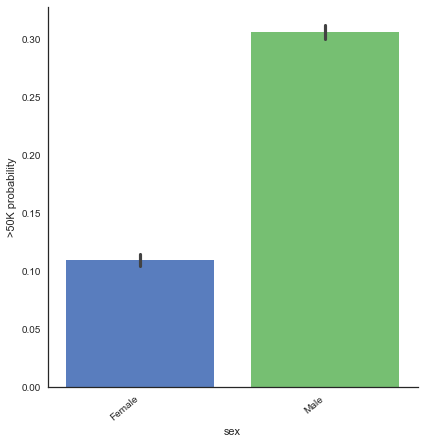

In [13]:
p = sns.factorplot(data = csv, x = 'sex', y = 'income', size = 6, palette='muted', kind='bar')
p.despine()
p.set_xticklabels(rotation=40, ha="right")
p = p.set_ylabels(">50K probability")

Probablity of making over $50K based on Ethnicity

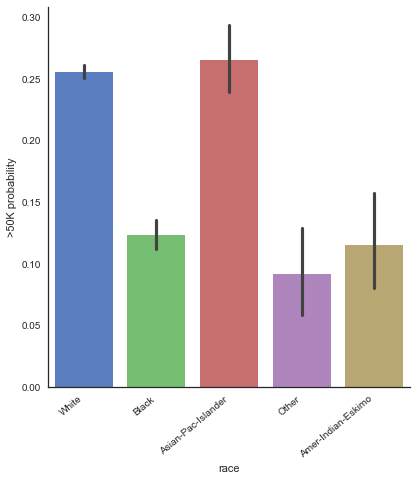

In [14]:
p = sns.factorplot(data = csv, x = 'race', y = 'income', size = 6, palette='muted', kind='bar')
p.despine()
p.set_xticklabels(rotation=40, ha="right")
p = p.set_ylabels(">50K probability")

Probablity of making over $50K based on Relationship

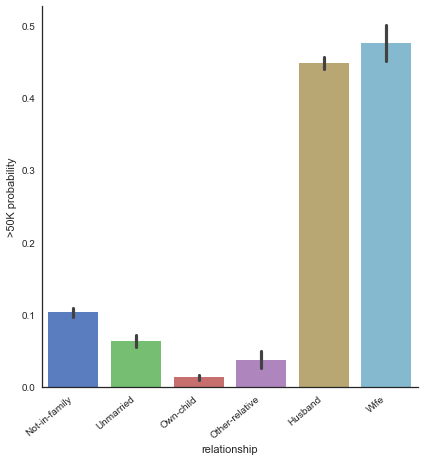

In [15]:
p = sns.factorplot(data = csv, x = 'relationship', y = 'income', size = 6, palette='muted', kind='bar')
p.despine()
p.set_xticklabels(rotation=40, ha="right")
p = p.set_ylabels(">50K probability")

Probablity of making over $50K based on Marital Status

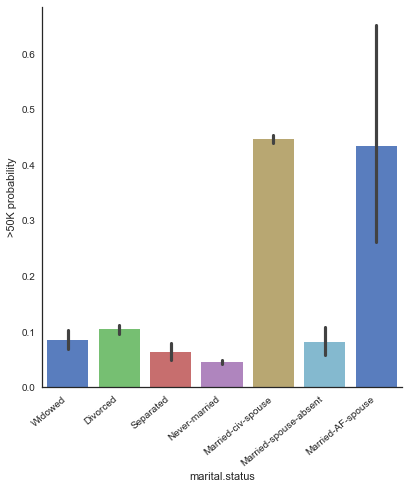

In [16]:
p = sns.factorplot(data = csv, x = 'marital.status', y = 'income', size = 6, palette='muted', kind='bar')
p.despine()
p.set_xticklabels(rotation=40, ha="right")
p = p.set_ylabels(">50K probability")

Binarize the data where applicable, to make classification easier

In [17]:
#Binarize the data fields applicable, and remove the redundant fields

csv['sex'] = csv['sex'].map({'Male':0, 'Female':1})
csv['marital.status'] = csv['marital.status'].replace(['Never-married','Divorced','Separated','Widowed'], 'Single')
csv['marital.status'] = csv['marital.status'].replace(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'], 'Married')
csv['marital.status'] = csv['marital.status'].map({'Married':1, 'Single':0})
csv['marital.status'] = csv['marital.status'].astype(int)
csv.drop(labels=["workclass","education","occupation","relationship","race","native.country"], axis=1, inplace=True)
csv.head(5)

,age,fnlwgt,education.num,marital.status,sex,capital.gain,capital.loss,hours.per.week,income
0,90,77053,9,0,1,0,4356,40,0
1,82,132870,9,0,1,0,4356,18,0
2,66,186061,10,0,1,0,4356,40,0
3,54,140359,4,0,1,0,3900,40,0
4,41,264663,10,0,1,0,3900,40,0


# Model Comparison

This is where we will compare numerous models and cross validate. This will help us determine which model is optimal. We will me employing Random Forests, Decision Trees, K-NN, and Linear Discriminant Analysis

In [29]:

data = csv.values
X = data[:,0:8]
Y = data[:,8] # what we want to predict

print("Our Independent Variable Data X:")
print(X)
print("Our Dependent Variable Y (income):")
print(Y)
print('\n')
print('*******************')
print('******RESULTS******')
print('*******************\n')

test_size = 0.3 # train and then test on 15% of the data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=test_size,random_state=7)

num_trees = 150
num_features = 3

model = []
model.append(('LDA', LinearDiscriminantAnalysis()))
model.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=num_features)))
model.append(('K-NN', KNeighborsClassifier()))
model.append(('C&R Tree', DecisionTreeClassifier()))
model.append(('Logistic Reg', LogisticRegression()))
model.append(('MLP', MLPClassifier()))
model.append(('GBoost', GradientBoostingClassifier()))

results = []
names = []

for name, models in model:
    kf = KFold(n_splits=10, random_state=7)
    cross_val_results = cross_val_score(models, X_train, Y_train, cv = kf, scoring='accuracy')
    results.append(cross_val_results)
    names.append(name)
    print("%s: %f (%f)" % (name, cross_val_results.mean(), cross_val_results.std()))
    

Our Independent Variable Data X:
[[    90  77053      9 ...      0   4356     40]
 [    82 132870      9 ...      0   4356     18]
 [    66 186061     10 ...      0   4356     40]
 ...
 [    40 154374      9 ...      0      0     40]
 [    58 151910      9 ...      0      0     40]
 [    22 201490      9 ...      0      0     20]]
Our Dependent Variable Y (income):
[0 0 0 ... 1 0 0]


*******************
******RESULTS******
*******************

LDA: 0.829941 (0.006500)
RF: 0.842752 (0.005797)
K-NN: 0.772333 (0.007129)
C&R Tree: 0.805897 (0.006034)
Logistic Reg: 0.796683 (0.005364)
MLP: 0.621783 (0.249299)
GBoost: 0.859776 (0.004687)


Boxplot of our results

Text(0,0.5,'Accuracy')

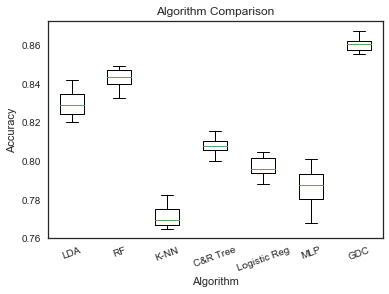

In [27]:
fig, ax = plt.subplots()
ax.boxplot(results)
ax.set_xticklabels(names, rotation = 20)
ax.set_title('Algorithm Comparison')
ax.set_xlabel('Algorithm')
ax.set_ylabel('Accuracy')

We will pursue modifying the metrics in our Random Forest model and Gradient Boost model, as these were the most effective models.

In [33]:
# Redefine the training and test size
test_size = 0.2
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=test_size,random_state=7)

print('\n********************************************')
print('***********Random Forest Results************')
print('********************************************')
for i in range(1,9):
    rf = RandomForestClassifier(n_estimators=300, max_features=i)
    rf.fit(X_train, Y_train)
    income_pred = rf.predict(X_test)
    accuracy = accuracy_score(Y_test, income_pred)
    print('Accuracy: %s%%' % (accuracy*100), 'using ', i, ' features')

print('\n********************************************')
print("****Gradient Boosting Classifier Results****")
print('********************************************')
for i in range(1,9):
    gb = GradientBoostingClassifier(n_estimators=400, max_features=i)
    gb.fit(X_train, Y_train)
    income_pred = gb.predict(X_test)
    accuracy = accuracy_score(Y_test, income_pred)
    print('Accuracy: %s%%' % (accuracy*100), 'using ', i, ' features')
    


********************************************
***********Random Forest Results************
********************************************
Accuracy: 84.12405957316138% using  1  features
Accuracy: 84.27759864885613% using  2  features
Accuracy: 84.13941348073085% using  3  features
Accuracy: 84.09335175802242% using  4  features
Accuracy: 84.27759864885613% using  5  features
Accuracy: 84.30830646399508% using  6  features
Accuracy: 84.1701212958698% using  7  features
Accuracy: 84.06264394288347% using  8  features

********************************************
****Gradient Boosting Classifier Results****
********************************************
Accuracy: 85.82834331337325% using  1  features
Accuracy: 86.15077537233226% using  2  features
Accuracy: 86.15077537233226% using  3  features
Accuracy: 86.24289881774911% using  4  features
Accuracy: 86.15077537233226% using  5  features
Accuracy: 86.27360663288806% using  6  features
Accuracy: 86.19683709504069% using  7  features
Accuracy:

Index(['age', 'fnlwgt', 'education.num', 'marital.status', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'income'],
      dtype='object')

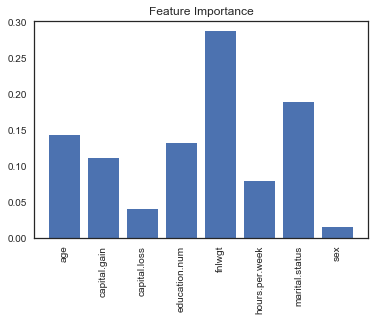

In [34]:
importances = rf.feature_importances_
features = ['age', 'fnlwgt', 'education.num', 'marital.status', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week']
ax = plt.bar(features, importances)
plt.xticks(rotation = 'vertical')
plt.title('Feature Importance')
csv.columns

In [35]:
print(classification_report(Y_test, income_pred))

             precision    recall  f1-score   support

          0       0.88      0.94      0.91      4964
          1       0.77      0.60      0.67      1549

avg / total       0.86      0.86      0.86      6513



# Conclusion

We found that the Gradient Boost Classifier was an effective method from our cross validation. We were able to achieve 86% accuracy in predicting whether or not an individual's income is greater than $50K